In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')
  
# Track with the model
results = model.predict(source= r"videos\testcode.mp4", classes=[2, 7], conf = 0.20)




    WARNING  stream/video/webcam/dir predict source will accumulate results in RAM unless `stream=True` is passed,
    causing potential out-of-memory errors for large sources or long-running streams/videos.

    Usage:
        results = model(source=..., stream=True)  # generator of Results objects
        for r in results:
            boxes = r.boxes  # Boxes object for bbox outputs
            masks = r.masks  # Masks object for segment masks outputs
            probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/169) c:\Workspaces\Opencv\TrackingObjects\videos\testcode.mp4: 384x640 8 cars, 238.1ms
video 1/1 (2/169) c:\Workspaces\Opencv\TrackingObjects\videos\testcode.mp4: 384x640 8 cars, 168.0ms
video 1/1 (3/169) c:\Workspaces\Opencv\TrackingObjects\videos\testcode.mp4: 384x640 9 cars, 186.4ms
video 1/1 (4/169) c:\Workspaces\Opencv\TrackingObjects\videos\testcode.mp4: 384x640 8 cars, 194.0ms
video 1/1 (5/169) c:\Workspaces\Opencv\TrackingObjects\videos

In [3]:
len(results)

169

In [4]:
results[0].boxes

WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.yolo.engine.results.Boxes object with attributes:

boxes: tensor([[1.8222e+03, 7.1676e+02, 1.9195e+03, 8.0588e+02, 7.2820e-01, 2.0000e+00],
        [9.0984e+02, 6.4150e+02, 1.0192e+03, 7.2918e+02, 6.4666e-01, 2.0000e+00],
        [1.1587e+03, 6.3792e+02, 1.2800e+03, 7.0835e+02, 5.6168e-01, 2.0000e+00],
        [1.1572e+03, 6.4193e+02, 1.2403e+03, 7.0936e+02, 4.7399e-01, 2.0000e+00],
        [1.3364e+03, 6.5143e+02, 1.4206e+03, 6.9844e+02, 4.4442e-01, 2.0000e+00],
        [1.4567e+03, 6.4933e+02, 1.5128e+03, 6.7836e+02, 4.3784e-01, 2.0000e+00],
        [1.6601e+03, 6.5635e+02, 1.7208e+03, 7.2412e+02, 2.5414e-01, 2.0000e+00],
        [9.0777e+02, 6.3858e+02, 1.1013e+03, 7.2547e+02, 2.1436e-01, 2.0000e+00]])
cls: tensor([2., 2., 2., 2., 2., 2., 2., 2.])
conf: tensor([0.7282, 0.6467, 0.5617, 0.4740, 0.4444, 0.4378, 0.2541, 0.2144])
data: tensor([[1.8222e+03, 7.1676e+02, 1.9195e+03, 8.0588e+02, 7.2820e-01, 2.0000e+00],
        [9.0984e+02, 6.4150e+02, 1.0192e+03, 7.2918e+02, 6.4

In [5]:
results[0].boxes.xyxy.numpy()

array([[     1822.2,      716.76,      1919.5,      805.88],
       [     909.84,       641.5,      1019.2,      729.18],
       [     1158.7,      637.92,        1280,      708.35],
       [     1157.2,      641.93,      1240.3,      709.36],
       [     1336.4,      651.43,      1420.6,      698.44],
       [     1456.7,      649.33,      1512.8,      678.36],
       [     1660.1,      656.35,      1720.8,      724.12],
       [     907.77,      638.58,      1101.3,      725.47]], dtype=float32)

In [11]:
from tracker2 import *

input_boxes = results[0].boxes.xyxy.numpy().astype(int)

nms_results = non_max_suppression2(input_boxes, iou_threshold=0.5)

# In kết quả sau khi áp dụng Efficient NMS
for box in nms_results:
    print(box)

[ 907  638 1101  725]
[1158  637 1280  708]
[1822  716 1919  805]
[1660  656 1720  724]
[1336  651 1420  698]
[1456  649 1512  678]


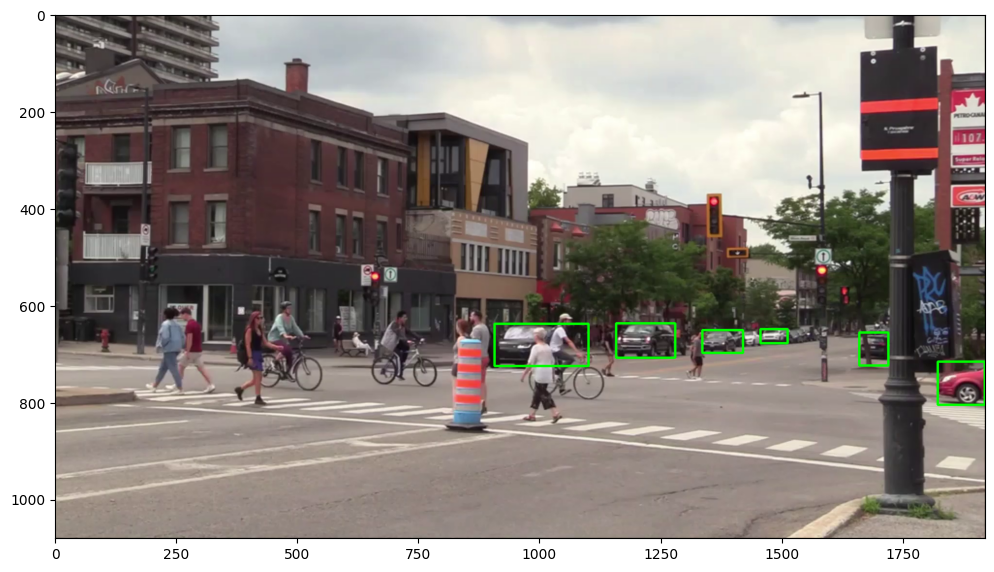

In [12]:
idx_frame = 0
# boxes = results[idx_frame].boxes.xyxy.numpy()
boxes = nms_results
img = results[idx_frame].orig_img
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for i in range(len(boxes)):
    x1, y1, x2, y2 = map(int, boxes[i])
    # cv2.putText(img, str(id), (x1, y1), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 2)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 3)

plt.figure(figsize=(12, 8))
plt.imshow(img)

In [19]:
from filterpy.kalman import KalmanFilter
f = KalmanFilter (dim_x=2, dim_z=1)
f.x = np.array([2., 0.])
f.P = np.array([[1000., 0.], [0., 1000.]])
f.F = np.array([[1.,1.],
                [0.,1.]])
f.R = np.array([[5.]])
f.H = np.array([[1., 0.]])
from filterpy.common import Q_discrete_white_noise
f.Q = Q_discrete_white_noise(dim=2, dt=1, var=0.13)
z = 10
print(f.predict())
f.update(z)

None
